In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

In [2]:
def get_annot(annot_path = 'dataset/LEs920/train.txt'):
    """get annotation from dataset text"""
    with open(annot_path, 'r') as f:
        txt = f.readlines()
        annotations = [line.strip() for line in txt if len(line.strip().split()[1:]) != 0]
    resdic = {}
    for ann in annotations:
        ann = ann.split(' ')
        image_path = ann[0]
        boxarr = []
        for a in ann[1:]:
            box = np.fromstring(a, sep=',')
            boxarr.append(box)
        boxarr = np.array(boxarr)
        resdic[image_path] = boxarr

    return resdic



In [48]:
resdic = get_annot("./dataset/LE_cand1/train_aug.txt")

In [50]:

subset = 'train'
for k in list( resdic.keys() ):
    imgname =  k.split('/')[-1].replace('.jpg', '')
    print(k)
    os.system(f"cp {k} ./dataset/LE_cand1_yolov5/images/{subset}/{imgname}.jpg")
    with open(f'./dataset/LE_cand1_yolov5/labels/{subset}/{imgname}.txt', 'w') as f:
        for bbox in resdic[k]:
            y1, x1, y2, x2, class_id = bbox
            y1, x1, y2, x2 = int(y1), int(x1), int(y2), int(x2)
            xcenter = str((x1+x2)/2 / 576)
            ycenter = str((y1+y2)/2 / 576)
            width = str((x2-x1) / 576 )
            height = str( (y2-y1) / 576 )
            class_id = str( int(class_id) )
            
            bbox_ann = f'{class_id} {ycenter} {xcenter} {height} {width} \n'
        
            f.write(bbox_ann)
        

./dataset/LE_cand1/tiles_aug/003_2_r180.jpg
./dataset/LE_cand1/tiles_aug/002_1_fliph_r270.jpg
./dataset/LE_cand1/tiles_aug/003_2_fliph_r90.jpg
./dataset/LE_cand1/tiles_aug/011_6.jpg
./dataset/LE_cand1/tiles_aug/010_6_fliph_r90.jpg
./dataset/LE_cand1/tiles_aug/002_2_r270.jpg
./dataset/LE_cand1/tiles_aug/002_2_fliph_r180.jpg
./dataset/LE_cand1/tiles_aug/006_4_fliph_r180.jpg
./dataset/LE_cand1/tiles_aug/018_1_r180.jpg
./dataset/LE_cand1/tiles_aug/018_1.jpg
./dataset/LE_cand1/tiles_aug/002_2_r180.jpg
./dataset/LE_cand1/tiles_aug/013_5_r180.jpg
./dataset/LE_cand1/tiles_aug/006_4_r180.jpg
./dataset/LE_cand1/tiles_aug/006_4_r90.jpg
./dataset/LE_cand1/tiles_aug/001_2_r180.jpg
./dataset/LE_cand1/tiles_aug/010_6_fliph.jpg
./dataset/LE_cand1/tiles_aug/003_2_r90.jpg
./dataset/LE_cand1/tiles_aug/017_3_fliph_r270.jpg
./dataset/LE_cand1/tiles_aug/006_6_fliph_r270.jpg
./dataset/LE_cand1/tiles_aug/002_2_fliph_r90.jpg
./dataset/LE_cand1/tiles_aug/005_8_r90.jpg
./dataset/LE_cand1/tiles_aug/019_6_fliph_r1

### read in

In [54]:
pwd

'/Users/home/Documents/Research/preprocessing'

In [55]:
labelfile = "./dataset/LE_cand1_yolov5/labels/train/003_2.txt"

In [56]:
with open(labelfile, ) as f:
    lines = f.readlines()

In [57]:
lines

['0 0.1388888888888889 0.8168402777777778 0.16666666666666666 0.11631944444444445 \n',
 '0 0.5026041666666666 0.7118055555555556 0.24131944444444445 0.10416666666666667 \n',
 '0 0.2855902777777778 0.7821180555555556 0.16145833333333334 0.11284722222222222 \n',
 '0 0.59375 0.4262152777777778 0.09722222222222222 0.043402777777777776 \n',
 '0 0.5 0.3741319444444444 0.09375 0.05381944444444445 \n',
 '1 0.9730902777777778 0.7430555555555556 0.050347222222222224 0.052083333333333336 \n',
 '1 0.15625 0.2777777777777778 0.04513888888888889 0.04513888888888889 \n',
 '1 0.10416666666666667 0.7274305555555556 0.16319444444444445 0.16666666666666666 \n',
 '1 0.25 0.9600694444444444 0.04513888888888889 0.04513888888888889 \n',
 '1 0.6302083333333334 0.3263888888888889 0.05555555555555555 0.05555555555555555 \n']

In [75]:
annots = []
for line in lines:
    annots.append( np.fromstring(line, sep=' ') )
annots = np.stack( annots )
annots

array([[0.        , 0.13888889, 0.81684028, 0.16666667, 0.11631944],
       [0.        , 0.50260417, 0.71180556, 0.24131944, 0.10416667],
       [0.        , 0.28559028, 0.78211806, 0.16145833, 0.11284722],
       [0.        , 0.59375   , 0.42621528, 0.09722222, 0.04340278],
       [0.        , 0.5       , 0.37413194, 0.09375   , 0.05381944],
       [1.        , 0.97309028, 0.74305556, 0.05034722, 0.05208333],
       [1.        , 0.15625   , 0.27777778, 0.04513889, 0.04513889],
       [1.        , 0.10416667, 0.72743056, 0.16319444, 0.16666667],
       [1.        , 0.25      , 0.96006944, 0.04513889, 0.04513889],
       [1.        , 0.63020833, 0.32638889, 0.05555556, 0.05555556]])

In [76]:
def get_annot_yolov5(labelfile):
    """return box annotations from yolov5 coco textfile"""
    with open(labelfile, 'r') as f:
        lines = f.readlines()
    annots = []
    for line in lines:
        annots.append( np.fromstring(line, sep=' ') )
    annots = np.stack( annots )
    return annots
    
    

### plot

In [78]:
imgfile = "./dataset/LE_cand1_yolov5/images/train/003_2.jpg"
labelfile = "./dataset/LE_cand1_yolov5/labels/train/003_2.txt"

In [79]:
annots = get_annot_yolov5(labelfile)

In [82]:
img = cv2.imread(imgfile)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # change from bgr to rgb


In [84]:
annots

array([[0.        , 0.13888889, 0.81684028, 0.16666667, 0.11631944],
       [0.        , 0.50260417, 0.71180556, 0.24131944, 0.10416667],
       [0.        , 0.28559028, 0.78211806, 0.16145833, 0.11284722],
       [0.        , 0.59375   , 0.42621528, 0.09722222, 0.04340278],
       [0.        , 0.5       , 0.37413194, 0.09375   , 0.05381944],
       [1.        , 0.97309028, 0.74305556, 0.05034722, 0.05208333],
       [1.        , 0.15625   , 0.27777778, 0.04513889, 0.04513889],
       [1.        , 0.10416667, 0.72743056, 0.16319444, 0.16666667],
       [1.        , 0.25      , 0.96006944, 0.04513889, 0.04513889],
       [1.        , 0.63020833, 0.32638889, 0.05555556, 0.05555556]])

In [85]:
annots.shape

(10, 5)

In [88]:
labels = annots[:, 0]
boxes = annots[:, 1:] * img.shape[0]

In [89]:
boxes

array([[ 80. , 470.5,  96. ,  67. ],
       [289.5, 410. , 139. ,  60. ],
       [164.5, 450.5,  93. ,  65. ],
       [342. , 245.5,  56. ,  25. ],
       [288. , 215.5,  54. ,  31. ],
       [560.5, 428. ,  29. ,  30. ],
       [ 90. , 160. ,  26. ,  26. ],
       [ 60. , 419. ,  94. ,  96. ],
       [144. , 553. ,  26. ,  26. ],
       [363. , 188. ,  32. ,  32. ]])

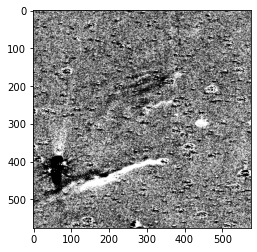

In [105]:
fig, ax = plt.subplots(1, figsize=(4,4))
ax.imshow(img);

In [109]:
from matplotlib import patches


In [112]:
boxes

array([[ 80. , 470.5,  96. ,  67. ],
       [289.5, 410. , 139. ,  60. ],
       [164.5, 450.5,  93. ,  65. ],
       [342. , 245.5,  56. ,  25. ],
       [288. , 215.5,  54. ,  31. ],
       [560.5, 428. ,  29. ,  30. ],
       [ 90. , 160. ,  26. ,  26. ],
       [ 60. , 419. ,  94. ,  96. ],
       [144. , 553. ,  26. ,  26. ],
       [363. , 188. ,  32. ,  32. ]])

In [ ]:
def xywh2xyxy():

In [113]:
boxes[0]

array([ 80. , 470.5,  96. ,  67. ])

In [114]:

x1, y1, x2, y2 = boxes[0]  
p = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=4,
                      alpha=1, linestyle='-',
                      edgecolor='r', facecolor='none')
ax.add_patch(p)

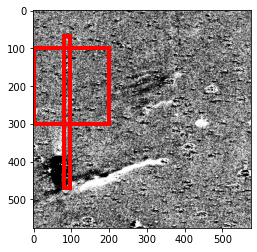

In [115]:
fig

### augmentation

In [53]:
import albumentations as A

In [121]:
np.where(np.array([[1,2,3],[1,2,3]])>2 )

(array([0, 1]), array([2, 2]))

In [125]:
np.array([1,2,3])< 1

array([ True,  True,  True])

In [126]:
def astrom_precision(fwhm, snr):
    """
    Calculate the approximate precision of astrometric measurements,
    given a particular seeing and SNR value.

    Returns
    -------
    float or numpy.ndarray
        The astrometric precision.
    """
    result = fwhm/(snr)
    return result



In [128]:
astrom_precision(np.array([1,2,3]), np.array([1,2,3]))

array([1., 1., 1.])

In [129]:
np.amin?